# Is Education Worth it?
---

Elise Sirivisal | Data Collector/Analyst <br>
Christophe Vivensang | Data Collector/Curator/Analyst/Visualizer  <br>
Kimberly Toro | Data Collector/Analyst <br>
Zhongxuan (Steven) Si | Data Visualizor/Designer

---
### Dependencies

In [2]:
# Dependencies for "Does Education Pay?"
# import scipy.stats as st
# import requests
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# Dependencies for "U.S. Census Datasets"
import requests
import hvplot
import hvplot.pandas
from census import Census
from us import states               #  See https://github.com/datamade/census to figure out the FIPS codes for many geographies. We maight need it later
from pathlib import Path
from scipy.stats import linregress

import numpy as np                  #  See https://holoviews.org/user_guide/Streaming_Data.html
import holoviews as hv
from holoviews import dim, opts

hv.extension('bokeh', 'matplotlib')

# Import U.S. Census API Key
from config import api_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

---
# Does education pay?

## Data Visualization:
Data from Kaggle: https://www.kaggle.com/datasets/asaniczka/wages-by-education-in-the-usa-1973-2022 <br>
This is data disaggregated by the highest level of education attained of workers in the USA from 1973 to 2022, sourced from the Economic Policy Institute’s State of Working America Data Library. <br>
<br>
Data Visualization: Wages by Education  (General Data)

In [3]:

wages_by_education = pd.read_csv('Data/wages_by_education.csv')
wages_by_education.head()

year  less_than_hs  high_school  some_college  bachelors_degree  \
0  2022         16.52        21.94         24.81             41.60   
1  2021         16.74        22.28         24.92             41.32   
2  2020         17.02        22.70         25.44             41.65   
3  2019         16.11        21.64         24.00             39.61   
4  2018         15.94        21.50         23.70             38.87   

   advanced_degree  men_less_than_hs  men_high_school  men_some_college  \
0            53.22             17.99            24.08             27.96   
1            53.45             18.34            24.36             27.96   
2            53.74             18.76            25.09             28.55   
3            51.57             17.55            23.99             26.99   
4            51.03             17.70            23.72             26.61   

   men_bachelors_degree  ...  black_women_less_than_hs  \
0                 49.01  ...                     13.89   
1                 47.83  ...                     13.73   
2                 48.15  ...                     13.66   
3                 45.74  ...                     13.30   
4                 44.97  ...                     12.48   

   black_women_high_school  black_women_some_college  \
0                    17.83                     20.36   
1                    18.30                     20.18   
2                    17.93                     20.31   
3                    17.18                     19.17   
4                    16.81                     18.57   

   black_women_bachelors_degree  black_women_advanced_degree  \
0                         29.94                        39.41   
1                         29.35                        40.07   
2                         31.38                        42.44   
3                         30.31                        40.42   
4                         30.85                        39.64   

   hispanic_women_less_than_hs  hispanic_women_high_school  \
0                        14.74                       18.18   
1                        14.97                       18.34   
2                        14.58                       18.50   
3                        14.50                       17.71   
4                        13.47                       17.28   

   hispanic_women_some_college  hispanic_women_bachelors_degree  \
0                        20.64                            31.13   
1                        21.14                            31.25   
2                        20.69                            31.55   
3                        19.69                            30.18   
4                        19.29                            29.47   

   hispanic_women_advanced_degree  
0                           40.64  
1                           42.47  
2                           44.15  
3                           42.30  
4                           39.35  

[5 rows x 61 columns]

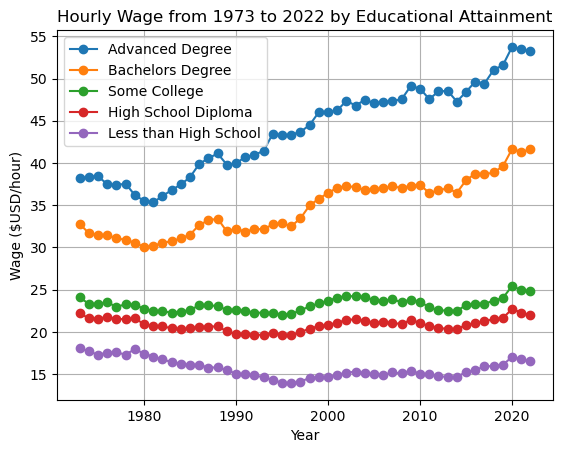

In [4]:
# From this, it's apparent that consistently over the course of these 4 decades, the higher the degree attained, generally the higher wage earned.
# As time progresses, the difference is more apparent.
wages_by_education_general_df = pd.DataFrame(wages_by_education[['year', 'less_than_hs', 'high_school', 'some_college', 'bachelors_degree', 'advanced_degree']])
wages_by_education_general_df.set_index('year', inplace=True)

# Plot the data
plt.plot(wages_by_education_general_df['advanced_degree'], label='Advanced Degree', marker='o')
plt.plot(wages_by_education_general_df['bachelors_degree'], label='Bachelors Degree', marker='o')
plt.plot(wages_by_education_general_df['some_college'], label='Some College', marker='o')
plt.plot(wages_by_education_general_df['high_school'], label='High School Diploma', marker='o')
plt.plot(wages_by_education_general_df['less_than_hs'], label='Less than High School', marker='o')

# Customize the plot
plt.title('Hourly Wage from 1973 to 2022 by Educational Attainment')
plt.xlabel('Year')
plt.ylabel('Wage ($USD/hour)')
plt.legend()
plt.grid(True)

# Save plot as png in 'Images' folder
plt.savefig('Images/wages_by_education.png')

# Display the plot
plt.show()

Data Visualization: Wages by Education (Men)

In [27]:
# Get wages by education data for men
wages_by_education_men_df = pd.DataFrame(wages_by_education[['year', 'men_less_than_hs', 'men_high_school', 'men_some_college', 'men_bachelors_degree', 'men_advanced_degree']])
wages_by_education_men_df = wages_by_education_men_df.iloc[:18,:]
wages_by_education_men_df.set_index('year', inplace=True)
# wages_by_education_men_df

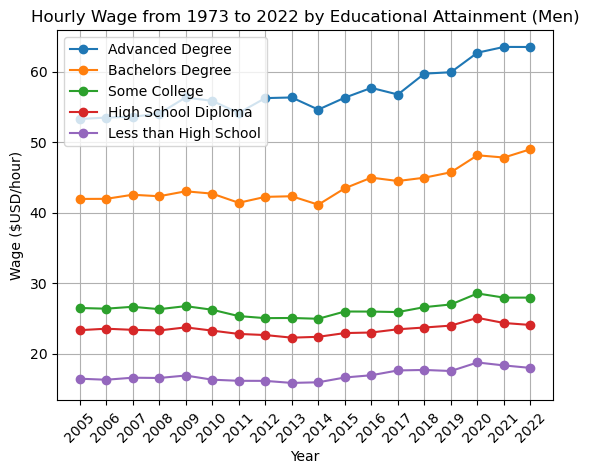

In [6]:
# Plot the data
plt.plot(wages_by_education_men_df['men_advanced_degree'], label='Advanced Degree', marker='o')
plt.plot(wages_by_education_men_df['men_bachelors_degree'], label='Bachelors Degree', marker='o')
plt.plot(wages_by_education_men_df['men_some_college'], label='Some College', marker='o')
plt.plot(wages_by_education_men_df['men_high_school'], label='High School Diploma', marker='o')
plt.plot(wages_by_education_men_df['men_less_than_hs'], label='Less than High School', marker='o')

# Customize the plot
plt.title('Hourly Wage from 1973 to 2022 by Educational Attainment (Men)')
plt.xlabel('Year')
plt.ylabel('Wage ($USD/hour)')
plt.legend(loc='upper left')
plt.xticks([int(year) for year in wages_by_education_men_df.index], rotation=45)  # Convert years to integers
plt.grid(True)

# Save plot as png in 'Images' folder
plt.savefig('Images/wages_by_education_men.png')

# Display the plot
plt.show()

Data Visualization: Wages by Education (Women)

In [ ]:
# Get wages by education data for women
wages_by_education_women_df = pd.DataFrame(wages_by_education[['year', 'women_less_than_hs', 'women_high_school', 'women_some_college', 'women_bachelors_degree', 'women_advanced_degree']])
wages_by_education_women_df = wages_by_education_women_df.iloc[:18,:]
wages_by_education_women_df.set_index('year', inplace=True)
# wages_by_education_women_df

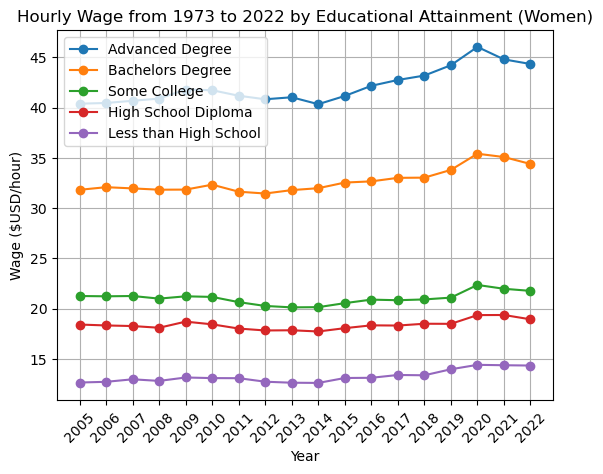

In [25]:
# Plot the data
plt.plot(wages_by_education_women_df['women_advanced_degree'], label='Advanced Degree', marker='o')
plt.plot(wages_by_education_women_df['women_bachelors_degree'], label='Bachelors Degree', marker='o')
plt.plot(wages_by_education_women_df['women_some_college'], label='Some College', marker='o')
plt.plot(wages_by_education_women_df['women_high_school'], label='High School Diploma', marker='o')
plt.plot(wages_by_education_women_df['women_less_than_hs'], label='Less than High School', marker='o')

# Customize the plot
plt.title('Hourly Wage from 1973 to 2022 by Educational Attainment (Women)')
plt.xlabel('Year')
plt.ylabel('Wage ($USD/hour)')
plt.legend(loc='upper left')
plt.xticks([int(year) for year in wages_by_education_women_df.index], rotation=45)  # Convert years to integers
plt.grid(True)

# Save plot as png in 'Images' folder
plt.savefig('Images/wages_by_education_women.png')

# Display the plot
plt.show()

### Data Visualization Analysis: <br>
Speaking in a general sense, when comparing the difference in hourly wages between men and women between 2020 and 2022, we see that women experienced a dip in hourly wage while men experienced a small, but noticeable increase in hourly wage, specifically for those who received at least a Bachelor's degree. Men who received less than a Bachelor's degree experienced the same dip in hourly wage that women experienced.<br>
<br>
The years most impacted by the COVID-19 pandemic were 2020 to 2022, beginning on March 12, 2020 when lockdown began and all movement on the street was restricted. This ultimately changed the natural flow of the US economy and workforce. When the US government implemented activity restrictions, the US experienced a surge in unemployment as a result of insufficient economic supportcompanies began implementing work-from-home policies. <br> 
(see Unemployment Rate Change (2020-2022) graph, ties into later section with career crises as it related to financial/economic downfalls in the US.)

## Salary by Major of First Bachelor's

In [7]:
# Data from US Census (Median Earnings in the Past 12 Months (in 2022 Inflation-Adjusted Dollars) by Sex by Field of Bachelor's Degree for First Major):
# https://data.census.gov/table?t=Educational+Attainment:Income+and+Poverty

# Read csv file
salary_by_gender_and_bachelors_df = pd.read_csv('Data/salary_by_gender_and_bachelors.csv')
salary_by_gender_and_bachelors_df.head()

Label (Grouping)  United States!!Estimate  \
0                                             Total:                  74154.0   
1                            Science and Engineering                      NaN   
2              Computers, Mathematics and Statistics                 100283.0   
3          Biological, Agricultural, and Environm...                  76444.0   
4                      Physical and Related Sciences                  83706.0   

  United States!!Margin of Error  
0                           ±166  
1                            NaN  
2                           ±470  
3                           ±586  
4                         ±1,244

In [14]:
# Save only data related to salary by major
salary_by_major = pd.DataFrame(salary_by_gender_and_bachelors_df.iloc[2:18, :2])
salary_by_major.columns = ['Major', 'Salary ($)']
salary_by_major = salary_by_major.drop(12)

In [30]:
# Customize dataframe to not include overarching categories, arrange in ascending order
salary_by_major = salary_by_major.reset_index(drop=True)
salary_by_major['Salary ($)'] = salary_by_major['Salary ($)'].astype(int)
salary_by_major = salary_by_major.sort_values(by='Salary ($)', ascending=True)
salary_by_major

Major  Salary ($)
14                         Visual and Performing Arts       54765
13                                          Education       57093
12                                         Psychology       62136
11                                              Other       62206
10                          Multidisciplinary Studies       63605
9                            Literature and Languages       64276
8                            Liberal Arts and History       65150
7                                      Communications       67010
6              Science and Engineering Related Fields       75847
5           Biological, Agricultural, and Environm...       76444
4                                     Social Sciences       80016
3                                            Business       80569
2                       Physical and Related Sciences       83706
1               Computers, Mathematics and Statistics      100283
0                                         Engineering      106736

### Data Visualization: Median Earnings in 2022 by Field of Bachelor's Degree for First Major (general, mean salary among all data collected in 2022)
The highest-paying salary is Engineering at ~$107 USD & Computers, Mathematics, and Statistics as a runner-up at ~$100 USD. The lowest-paying salary is visual and performing arts at ~$55 USD & Education as a runner-up at ~$57 USD. Those with technical bachelor’s degrees earn significantly more than graduates in non-technical fields

<Figure size 700x900 with 0 Axes>

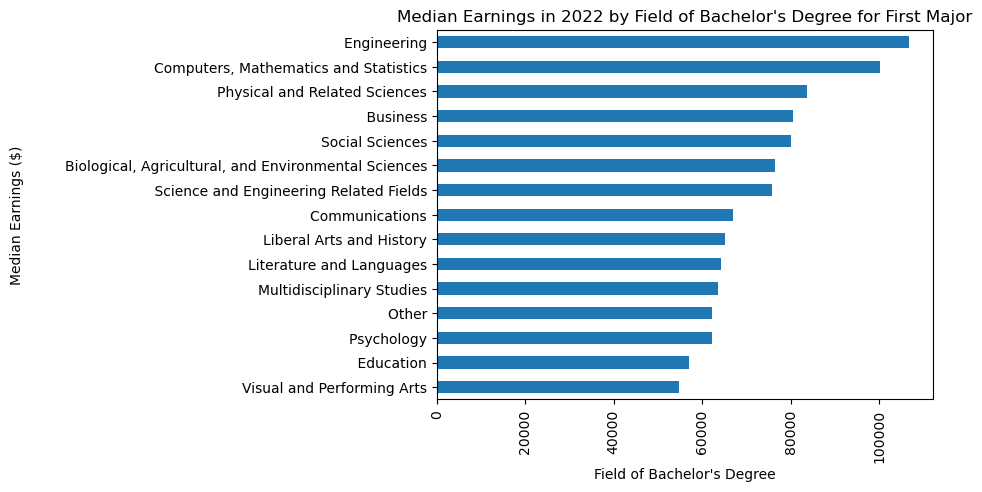

In [31]:
# Plot the data
plt.figure(figsize=(7, 9))
salary_by_major.plot(x='Major', y='Salary ($)', kind='barh', legend=False)

# Customize the plot
plt.title("Median Earnings in 2022 by Field of Bachelor's Degree for First Major")
plt.xlabel("Field of Bachelor's Degree")
plt.ylabel("Median Earnings ($)")
plt.xticks(rotation=90)

# Save plot as png in 'Images' folder
plt.savefig('Images/salary_by_major.png')

# Display the plot
plt.show()

---
# 2. U.S. Census Datasets
What does the US Census tell us?

## Retrieve data from the U.S. Census using the Census library

### All the relevant data can be found in the American Community Survey 5-Year Data
https://www.census.gov/data/developers/data-sets/acs-5year.html <br>
### First the Detailed Tables at the State level and at the ZIP Code level:

In [2]:
#                                   ****  CENSUS DETAILED TABLES FOR STATES  ****

year= 2021
# Create an instance of the Census library          *** WORKS WITH DETAILED TABLES, NOT WITH DATA PROFILE   ***
c = Census(
    api_key,
    year = year
)

# Run Census Search to retrieve Detailed Tables on all states (per the year requested in the census instance) ONLY 50 fields per query.
census_data_dt_state = c.acs5.get(
    (
        "NAME",
        "B15003_002E",
        "B15003_017E",
        "B15003_018E",
        "B15003_018E",
        "B15003_019E",
        "B15003_020E",
        "B15003_021E",
        "B15003_022E",
        "B15003_023E",
        "B15003_024E",
    ),
    {'for': 'state:*'}                  #  Can be changed later to get the granularity to the ZIP code, County, or Census Tract (TRACT)
)                                       #  by replacing with {'for': 'zip code tabulation area:*'}

# Convert to DataFrame
census_dt_state_DF = pd.DataFrame(census_data_dt_state)


# Column renaming
census_dt_state_DF = census_dt_state_DF.rename(
    columns = {
        "B15003_002E": "No schooling completed",
        "B15003_017E": "Regular high school diploma",
        "B15003_018E": "GED or alternative credential",
        "B15003_019E": "Some college, less than 1 year",
        "B15003_020E": "Some college, 1 or more years, no degree",
        "B15003_021E": "Associate's degree",
        "B15003_022E": "Bachelor's degree",
        "B15003_023E": "Master's degree",
        "B15003_024E": "Doctorate degree",
        "NAME": "Name",
        "zip code tabulation area": "State"     #  Can be changed later to get the granularity to the ZIP code, County, or Census Tract (TRACT)
    }                                           #  by replacing with "zip code tabulation area": "Zipcode"
)


census_dt_state_DF = census_dt_state_DF.astype({
"No schooling completed":'float',
"Regular high school diploma":'float',
"GED or alternative credential":'float',
"Some college, less than 1 year":'float',
"Some college, 1 or more years, no degree":'float',
"Associate's degree":'float',
"Bachelor's degree":'float',
"Master's degree":'float',
"Doctorate degree":'float'
})


census_dt_state_DF

Name  No schooling completed  Regular high school diploma  \
0                Alabama                 43813.0                     864345.0   
1                 Alaska                  3675.0                     111772.0   
2                Arizona                 74688.0                     934136.0   
3               Arkansas                 26523.0                     566668.0   
4             California                820953.0                    4836799.0   
5               Colorado                 48362.0                     657382.0   
6            Connecticut                 33094.0                     579708.0   
7               Delaware                  6240.0                     186669.0   
8   District of Columbia                  6160.0                      63511.0   
9                Florida                248308.0                    3641011.0   
10               Georgia                107120.0                    1598837.0   
11                Hawaii                 11896.0                     246918.0   
12                 Idaho                 11869.0                     253718.0   
13              Illinois                130900.0                    1910784.0   
14               Indiana                 51633.0                    1250041.0   
15                  Iowa                 19109.0                     565056.0   
16                Kansas                 22280.0                     416830.0   
17              Kentucky                 34640.0                     803049.0   
18             Louisiana                 41515.0                     864695.0   
19                 Maine                  6330.0                     258100.0   
20              Maryland                 64093.0                     884726.0   
21         Massachusetts                 79741.0                     998781.0   
22              Michigan                 79529.0                    1698210.0   
23             Minnesota                 53273.0                     801722.0   
24           Mississippi                 25884.0                     469188.0   
25              Missouri                 38307.0                    1083713.0   
26               Montana                  3112.0                     172411.0   
27              Nebraska                 19563.0                     281323.0   
28                Nevada                 40475.0                     497592.0   
29         New Hampshire                  7085.0                     228387.0   
30            New Jersey                100246.0                    1532767.0   
31            New Mexico                 19774.0                     305573.0   
32              New York                329538.0                    2992384.0   
33        North Carolina                 88587.0                    1491885.0   
34          North Dakota                  3823.0                     110990.0   
35                  Ohio                 78456.0                    2324639.0   
36              Oklahoma                 30779.0                     673014.0   
37                Oregon                 34201.0                     539294.0   
38          Pennsylvania                 98390.0                    2727779.0   
39          Rhode Island                 12521.0                     178129.0   
40        South Carolina                 39318.0                     851802.0   
41          South Dakota                  4431.0                     147811.0   
42             Tennessee                 51894.0                    1217869.0   
43                 Texas                428003.0                    3747907.0   
44                  Utah                 18794.0                     377270.0   
45               Vermont                  2630.0                     113463.0   
46              Virginia                 74749.0                    1173844.0   
47            Washington                 70975.0                     946464.0   
48         West Virginia                 10840.0   

In [3]:
#                                   ****  CENSUS DETAILED TABLES FOR ZIP CODES  ****

year= 2021
# Create an instance of the Census library          *** WORKS WITH DETAILED TABLES, NOT WITH DATA PROFILE   ***
c = Census(
    api_key,
    year = year
)

# Run Census Search to retrieve data on all zip codes (per the year requested in the census instance) ONLY 50 fields per query.  FOR ZIP CODES
census_dt_data_ZCTA = c.acs5.get(
    (
        "NAME",
        "B15003_002E",
        "B15003_017E",
        "B15003_018E",
        "B15003_018E",
        "B15003_019E",
        "B15003_020E",
        "B15003_021E",
        "B15003_022E",
        "B15003_023E",
        "B15003_024E",
    ),
    {'for': 'zip code tabulation area:*'}                  
)                                      

# Convert to DataFrame
census_dt_ZCTA_DF = pd.DataFrame(census_dt_data_ZCTA)


# Column renaming
census_dt_ZCTA_DF = census_dt_ZCTA_DF.rename(
    columns = {
        "B15003_002E": "No schooling completed",
        "B15003_017E": "Regular high school diploma",
        "B15003_018E": "GED or alternative credential",
        "B15003_019E": "Some college, less than 1 year",
        "B15003_020E": "Some college, 1 or more years, no degree",
        "B15003_021E": "Associate's degree",
        "B15003_022E": "Bachelor's degree",
        "B15003_023E": "Master's degree",
        "B15003_024E": "Doctorate degree",
        "NAME": "Name",
        "zip code tabulation area": "Zipcode"     
    }                                             
)
census_dt_ZCTA_DF['Name'].replace('ZCTA5 ','',regex=True, inplace=True)     # Makes the NAME a 5-digit Zip Code


census_dt_ZCTA_DF = census_dt_ZCTA_DF.astype({
"No schooling completed":'float',
"Regular high school diploma":'float',
"GED or alternative credential":'float',
"Some college, less than 1 year":'float',
"Some college, 1 or more years, no degree":'float',
"Associate's degree":'float',
"Bachelor's degree":'float',
"Master's degree":'float',
"Doctorate degree":'float'
})


census_dt_ZCTA_DF

Name  No schooling completed  Regular high school diploma  \
0      00601                   403.0                       3388.0   
1      00602                   844.0                       6501.0   
2      00603                   662.0                       9767.0   
3      00606                   188.0                       1243.0   
4      00610                   760.0                       5404.0   
...      ...                     ...                          ...   
33769  99923                     0.0                          0.0   
33770  99925                     0.0                        191.0   
33771  99926                     0.0                        318.0   
33772  99927                     0.0                         11.0   
33773  99929                     1.0                        497.0   

       GED or alternative credential  Some college, less than 1 year  \
0                              230.0                           201.0   
1                              742.0                           250.0   
2                              874.0                           475.0   
3                              115.0                            89.0   
4                              546.0                           189.0   
...                              ...                             ...   
33769                            0.0                             0.0   
33770                           56.0                            41.0   
33771                           84.0                            32.0   
33772                            0.0                             0.0   
33773                           80.0                           122.0   

       Some college, 1 or more years, no degree  Associate's degree  \
0                                         956.0              1532.0   
1                                        1908.0              3104.0   
2                                        4006.0              3030.0   
3                                         400.0               210.0   
4                                        1411.0              2431.0   
...                                         ...                 ...   
33769                                       0.0                 0.0   
33770                                     140.0                52.0   
33771                                     260.0               111.0   
33772                                       0.0                 0.0   
33773                                     270.0               118.0   

       Bachelor's degree  Master's degree  Doctorate degree Zipcode  
0                 1592.0            179.0              20.0   00601  
1                 4659.0           1168.0             139.0   00602  
2                 6042.0           1983.0             413.0   00603  
3                  313.0            123.0               0.0   00606  
4                 2769.0            655.0             108.0   00610  
...                  ...              ...               ...     ...  
33769               13.0              0.0               0.0   99923  
33770               81.0             40.0               0.0   99925  
33771               65.0             26.0               0.0   99926  
33772                0.0              0.0               0.0   99927  
33773              175.0             54.0               1.0   99929  

[33774 rows x 11 columns]

### Then the Data Profiles at the State level and at the ZIP Code level

In [4]:
#                                   ****  Data Profiles FOR STATES  ****


# To query multiple DATA PROFILE variables at the same time.
year='2021'       # Change the year in the URL

a=("NAME,"+\
"DP02_0001E"+","\
"DP03_0092E"+","\
"DP03_0062E"+","\
"DP03_0052E"+","\
"DP03_0053E"+","\
"DP03_0054E"+","\
"DP03_0055E"+","\
"DP03_0056E"+","\
"DP03_0057E"+","\
"DP03_0058E"+","\
"DP03_0059E"+","\
"DP03_0060E"+","\
"DP03_0061E"+","\
"DP05_0020E"+","\
"DP05_0021E"+","\
"DP05_0024E"+\
"&for=state:*"
)
base_url=f"https://api.census.gov/data/{year}/acs/acs5/profile?get={a}"
dataset_DP_state = requests.get(base_url).json()


# Creation of dataframe and data clean-up

dataset_DP_state_DF=pd.DataFrame(dataset_DP_state)
dataset_DP_state_DF.columns = dataset_DP_state_DF.iloc[0]  # Creates the dataframe column headers
dataset_DP_state_DF.drop(index=0,axis=0,inplace=True)      # Removes duplicate first row


# Rename the column headers
dataset_DP_state_DF.rename(columns={
"DP03_0092E": "Median earnings for workers (dollars)",
"DP02_0001E": "Total household",
"DP03_0062E": "Total households!!Median household income (dollars)",
"DP03_0052E": "Total households!!Less than $10,000",
"DP03_0053E": "Total households!!$10,000 to $14,999",
"DP03_0054E": "Total households!!$15,000 to $24,999",
"DP03_0055E": "Total households!!$25,000 to $34,999",
"DP03_0056E": "Total households!!$35,000 to $49,999",
"DP03_0057E": "Total households!!$50,000 to $74,999",
"DP03_0058E": "Total households!!$75,000 to $99,999",
"DP03_0059E":"Total households!!$100,000 to $149,999",
"DP03_0060E": "Total households!!$150,000 to $199,999",
"DP03_0061E": "Total households!!$200,000 or more",
"DP05_0020E": "Total population!!16 years and over",
"DP05_0021E": "Total population!!18 years and over",
"DP05_0024E": "Total population!!65 years and over",
"NAME": "Name"},
inplace=True)

dataset_DP_state_DF = dataset_DP_state_DF.astype({
'Median earnings for workers (dollars)':'float',
"Total household": 'float',
"Total households!!Median household income (dollars)":'float',
"Total households!!Less than $10,000":'float',
"Total households!!$10,000 to $14,999":'float',
"Total households!!$15,000 to $24,999":'float',
"Total households!!$25,000 to $34,999":'float',
"Total households!!$35,000 to $49,999":'float',
"Total households!!$50,000 to $74,999":'float',
"Total households!!$75,000 to $99,999":'float',
"Total households!!$100,000 to $149,999":'float',
"Total households!!$150,000 to $199,999":'float',
"Total households!!$200,000 or more":'float',
"Total population!!16 years and over":'float',
"Total population!!18 years and over":'float',
"Total population!!65 years and over":'float'
})


dataset_DP_state_DF

0                   Name  Total household  \
1                Alabama        1902983.0   
2                 Alaska         260561.0   
3                Arizona        2683557.0   
4               Arkansas        1158460.0   
5             California       13217586.0   
6               Colorado        2227932.0   
7            Connecticut        1397324.0   
8               Delaware         381097.0   
9   District of Columbia         310104.0   
10               Florida        8157420.0   
11               Georgia        3885371.0   
12                Hawaii         478413.0   
13                 Idaho         657101.0   
14              Illinois        4930255.0   
15               Indiana        2622601.0   
16                  Iowa        1275893.0   
17                Kansas        1139738.0   
18              Kentucky        1748475.0   
19             Louisiana        1748688.0   
20                 Maine         571064.0   
21              Maryland        2294270.0   
22         Massachusetts        2714448.0   
23              Michigan        3976729.0   
24             Minnesota        2229100.0   
25           Mississippi        1108670.0   
26              Missouri        2433819.0   
27               Montana         436481.0   
28              Nebraska         766887.0   
29                Nevada        1141952.0   
30         New Hampshire         540498.0   
31            New Jersey        3397156.0   
32            New Mexico         797596.0   
33              New York        7530150.0   
34        North Carolina        4034684.0   
35          North Dakota         316542.0   
36                  Ohio        4754161.0   
37              Oklahoma        1503868.0   
38                Oregon        1658091.0   
39          Pennsylvania        5147783.0   
40          Rhode Island         426769.0   
41        South Carolina        1976447.0   
42          South Dakota         345779.0   
43             Tennessee        2664791.0   
44                 Texas       10239341.0   
45                  Utah        1033651.0   
46               Vermont         262514.0   
47              Virginia        3248528.0   
48            Washington        2931841.0   
49         West Virginia         711352.0   
50             Wisconsin        2401818.0   
51               Wyoming         230653.0   
52           Puerto Rico              NaN   

0   Median earnings for workers (dollars)  \
1                                 33894.0   
2                                 42523.0   
3                                 37076.0   
4                                 32958.0   
5                                 40901.0   
6                                 42530.0   
7                                 44872.0   
8                                 39850.0   
9                                 66044.0   
10                                34367.0   
11                                36788.0   
12                                41216.0   
13                                32465.0   
14                                40925.0   
15                                36380.0   
16                                37604.0   
17                                36603.0   
18                                33937.0   
19                                34357.0   
20                                36746.0   
21                                48993.0   
22                                48078.0   
23                                35808.0   
24                                42707.0   
25                                31784.0   
26                                36013.0   
27                                32795.0   
28                                37463.0   
29                                36800.0   
30                                43313.0   
31                                47304.0   
32                                31889.0   
33                                43234.0   
34                                35554.0   
35                                39644

In [5]:
#                                   ****  Data Profiles FOR ZIP CODES  ****


# To query multiple DATA PROFILE variables at the same time. FOR ZIP CODES
year='2021'       # Change the year in the URL

a=("NAME,"+\
"DP02_0001E"+","\
"DP03_0092E"+","\
"DP03_0062E"+","\
"DP03_0052E"+","\
"DP03_0053E"+","\
"DP03_0054E"+","\
"DP03_0055E"+","\
"DP03_0056E"+","\
"DP03_0057E"+","\
"DP03_0058E"+","\
"DP03_0059E"+","\
"DP03_0060E"+","\
"DP03_0061E"+","\
"DP05_0020E"+","\
"DP05_0021E"+","\
"DP05_0024E"+\
"&for=zip code tabulation area:*"
)
base_url=f"https://api.census.gov/data/{year}/acs/acs5/profile?get={a}"
dataset_DP_ZCTA = requests.get(base_url).json()


# Creation of dataframe and data clean-up
dataset_DP_ZCTA_DF=pd.DataFrame(dataset_DP_ZCTA)
dataset_DP_ZCTA_DF.columns = dataset_DP_ZCTA_DF.iloc[0]  # Creates the dataframe column headers
dataset_DP_ZCTA_DF.drop(index=0,axis=0,inplace=True)     # Removes duplicate first row


# Rename the column headers  FOR ZIP CODES
dataset_DP_ZCTA_DF.rename(columns={
"DP03_0092E": "Median earnings for workers (dollars)",
"DP02_0001E": "Total household",
"DP03_0062E": "Total households!!Median household income (dollars)",
"DP03_0052E": "Total households!!Less than $10,000",
"DP03_0053E": "Total households!!$10,000 to $14,999",
"DP03_0054E": "Total households!!$15,000 to $24,999",
"DP03_0055E": "Total households!!$25,000 to $34,999",
"DP03_0056E": "Total households!!$35,000 to $49,999",
"DP03_0057E": "Total households!!$50,000 to $74,999",
"DP03_0058E": "Total households!!$75,000 to $99,999",
"DP03_0059E": "Total households!!$100,000 to $149,999",
"DP03_0060E": "Total households!!$150,000 to $199,999",
"DP03_0061E": "Total households!!$200,000 or more",
"DP05_0020E": "Total population!!16 years and over",
"DP05_0021E": "Total population!!18 years and over",
"DP05_0024E": "Total population!!65 years and over",
"NAME": "Name"},
inplace=True)
dataset_DP_ZCTA_DF['Name'].replace('ZCTA5 ','',regex=True, inplace=True)     # Makes the NAME a 5-digit Zip Code

dataset_DP_ZCTA_DF = dataset_DP_ZCTA_DF.astype({
'Median earnings for workers (dollars)':'float',
"Total household": 'float',
"Total households!!Median household income (dollars)":'float',
"Total households!!Less than $10,000":'float',
"Total households!!$10,000 to $14,999":'float',
"Total households!!$15,000 to $24,999":'float',
"Total households!!$25,000 to $34,999":'float',
"Total households!!$35,000 to $49,999":'float',
"Total households!!$50,000 to $74,999":'float',
"Total households!!$75,000 to $99,999":'float',
"Total households!!$100,000 to $149,999":'float',
"Total households!!$150,000 to $199,999":'float',
"Total households!!$200,000 or more":'float',
"Total population!!16 years and over":'float',
"Total population!!18 years and over":'float',
"Total population!!65 years and over":'float',
 })
dataset_DP_ZCTA_DF = dataset_DP_ZCTA_DF[dataset_DP_ZCTA_DF['Median earnings for workers (dollars)'] >0]
dataset_DP_ZCTA_DF = dataset_DP_ZCTA_DF[dataset_DP_ZCTA_DF["Total households!!Median household income (dollars)"] >0]


dataset_DP_ZCTA_DF

0       Name  Total household  Median earnings for workers (dollars)  \
1      00601              NaN                                12541.0   
2      00602              NaN                                14180.0   
3      00603              NaN                                17449.0   
4      00606              NaN                                15565.0   
5      00610              NaN                                16262.0   
...      ...              ...                                    ...   
33768  99921            822.0                                37537.0   
33769  99922            121.0                                16750.0   
33771  99925            345.0                                26974.0   
33772  99926            457.0                                32214.0   
33774  99929            841.0                                38750.0   

0      Total households!!Median household income (dollars)  \
1                                                15292.0     
2                                                18716.0     
3                                                16789.0     
4                                                18835.0     
5                                                21239.0     
...                                                  ...     
33768                                            56214.0     
33769                                            45938.0     
33771                                            70625.0     
33772                                            58229.0     
33774                                            54946.0     

0      Total households!!Less than $10,000  \
1                                   1791.0   
2                                   3484.0   
3                                   6193.0   
4                                    559.0   
5                                   1828.0   
...                                    ...   
33768                                 39.0   
33769                                  8.0   
33771                                 26.0   
33772                                 15.0   
33774                                 33.0   

0      Total households!!$10,000 to $14,999  \
1                                     850.0   
2                                    1628.0   
3                                    2593.0   
4                                     261.0   
5                                    1179.0   
...                                     ...   
33768                                  58.0   
33769                                   9.0   
33771                                  14.0   
33772                                  21.0   
33774                                  18.0   

0      Total households!!$15,000 to $24,999  \
1                                    1288.0   
2                                    2631.0   
3                                    3319.0   
4                                     459.0   
5                                    2078.0   
...                                     ...   
33768                                  53.0   
33769                                  18.0   
33771                                  47.0   
33772                                  55.0   
33774                                  82.0   

0      Total households!!$25,000 to $34,999  \
1                                     721.0   
2                                    1845.0   
3                                    1913.0   
4                                     303.0   
5                                    1402.0   
...                                     ...   
33768                                  60.0   
33769                                  13.0   
33771                                  27.0   
33772                                  54.0   
33774                                 120.0   

0      Total households!!$35,000 to $49,999  \
1                                     471.0   
2                                    1407.0   
3

## Find City, State, Latitude, and Longitude for the ZCTA codes 

In [7]:
# Get Latitude and Longitude of all ZCTA codes
# Store filepath in a variable
zip_file2 = Path("Data/zipcode_to_state_lat_lon.csv")           # Coordinates for ZCTA codes where found at https://pypi.org/project/pyzipcode/
# Read our Data file with the pandas library
zip_lat_lon_DF2= pd.read_csv(zip_file2,dtype=str)
zip_lat_lon_DF2 = zip_lat_lon_DF2.astype({'latitude':'float','longitude':'float'})
zip_lat_lon_DF2.rename(columns={"zip":"ZIP"}, inplace=True)
zip_lat_lon_DF2

ZIP         city state   latitude   longitude timezone dst
0      00210   Portsmouth    NH  43.005895  -71.013202       -5   1
1      00211   Portsmouth    NH  43.005895  -71.013202       -5   1
2      00212   Portsmouth    NH  43.005895  -71.013202       -5   1
3      00213   Portsmouth    NH  43.005895  -71.013202       -5   1
4      00214   Portsmouth    NH  43.005895  -71.013202       -5   1
...      ...          ...   ...        ...         ...      ...  ..
43186  99926   Metlakatla    AK  55.123897 -131.568830       -9   1
43187  99927  Point Baker    AK  56.337957 -133.606890       -9   1
43188  99928    Ward Cove    AK  55.395359 -131.675370       -9   1
43189  99929     Wrangell    AK  56.409507 -132.338220       -9   1
43190  99950    Ketchikan    AK  55.875767 -131.466330       -9   1

[43191 rows x 7 columns]

### Merge the geodata to the Census dataframes

In [8]:
# Merging of the ZCTA dataframe to add Latitude and Longitude, as well as corresponding city and state (zip_lat_lon_DF2)

dataset_DP_ZCTA_LL_DF = pd.merge(zip_lat_lon_DF2, dataset_DP_ZCTA_DF, how="inner", left_on='ZIP', right_on='Name')

census_dt_ZCTA_LL_DF = pd.merge(zip_lat_lon_DF2, census_dt_ZCTA_DF, how="inner", left_on='ZIP', right_on='Name')

In [9]:
# Visualization  of the Data Profile dataframe after merging
dataset_DP_ZCTA_LL_DF

ZIP        city state   latitude  longitude timezone dst   Name  \
0      00601    Adjuntas    PR  18.180103  -66.74947       -4   0  00601   
1      00602      Aguada    PR  18.363285  -67.18024       -4   0  00602   
2      00603   Aguadilla    PR  18.448619  -67.13422       -4   0  00603   
3      00606     Maricao    PR  18.182151  -66.95880       -4   0  00606   
4      00610      Anasco    PR  18.288319  -67.13604       -4   0  00610   
...      ...         ...   ...        ...        ...      ...  ..    ...   
29506  99921       Craig    AK  55.456449 -133.02648       -9   1  99921   
29507  99922    Hydaburg    AK  55.209339 -132.82545       -9   1  99922   
29508  99925     Klawock    AK  55.555164 -133.07316       -9   1  99925   
29509  99926  Metlakatla    AK  55.123897 -131.56883       -9   1  99926   
29510  99929    Wrangell    AK  56.409507 -132.33822       -9   1  99929   

       Total household  Median earnings for workers (dollars)  ...  \
0                  NaN                                12541.0  ...   
1                  NaN                                14180.0  ...   
2                  NaN                                17449.0  ...   
3                  NaN                                15565.0  ...   
4                  NaN                                16262.0  ...   
...                ...                                    ...  ...   
29506            822.0                                37537.0  ...   
29507            121.0                                16750.0  ...   
29508            345.0                                26974.0  ...   
29509            457.0                                32214.0  ...   
29510            841.0                                38750.0  ...   

       Total households!!$35,000 to $49,999  \
0                                     471.0   
1                                    1407.0   
2                                    1795.0   
3                                     216.0   
4                                    1025.0   
...                                     ...   
29506                                  98.0   
29507                                  17.0   
29508                                  30.0   
29509                                  61.0   
29510                                 138.0   

       Total households!!$50,000 to $74,999  \
0                                     191.0   
1                                    1049.0   
2                                    1969.0   
3                                     151.0   
4                                     878.0   
...                                     ...   
29506                                 211.0   
29507                                  26.0   
29508                                  33.0   
29509                                  54.0   
29510                                 169.0   

       Total households!!$75,000 to $99,999  \
0                                      36.0   
1                                     427.0   
2                                     784.0   
3                                      13.0   
4                                     307.0   
...                                     ...   
29506                                  96.0   
29507                                   9.0   
29508                                  55.0   
29509                                  62.0   
29510                                  79.0   

       Total households!!$100,000 to $149,999  \
0                                        49.0   
1                                       257.0   
2                                       492.0   
3                                         6.0   
4                                       153.0   
...                                       ...   
29506                                   139.0   
29507                                    18.0   
29508                                    44.0   
29509                                   114.0   
29510                

In [10]:
# Visualization  of the Detailed Table dataframe after merging
census_dt_ZCTA_LL_DF

ZIP         city state   latitude  longitude timezone dst   Name  \
0      00601     Adjuntas    PR  18.180103  -66.74947       -4   0  00601   
1      00602       Aguada    PR  18.363285  -67.18024       -4   0  00602   
2      00603    Aguadilla    PR  18.448619  -67.13422       -4   0  00603   
3      00606      Maricao    PR  18.182151  -66.95880       -4   0  00606   
4      00610       Anasco    PR  18.288319  -67.13604       -4   0  00610   
...      ...          ...   ...        ...        ...      ...  ..    ...   
33524  99923        Hyder    AK  55.941442 -130.05450       -9   1  99923   
33525  99925      Klawock    AK  55.555164 -133.07316       -9   1  99925   
33526  99926   Metlakatla    AK  55.123897 -131.56883       -9   1  99926   
33527  99927  Point Baker    AK  56.337957 -133.60689       -9   1  99927   
33528  99929     Wrangell    AK  56.409507 -132.33822       -9   1  99929   

       No schooling completed  Regular high school diploma  \
0                       403.0                       3388.0   
1                       844.0                       6501.0   
2                       662.0                       9767.0   
3                       188.0                       1243.0   
4                       760.0                       5404.0   
...                       ...                          ...   
33524                     0.0                          0.0   
33525                     0.0                        191.0   
33526                     0.0                        318.0   
33527                     0.0                         11.0   
33528                     1.0                        497.0   

       GED or alternative credential  Some college, less than 1 year  \
0                              230.0                           201.0   
1                              742.0                           250.0   
2                              874.0                           475.0   
3                              115.0                            89.0   
4                              546.0                           189.0   
...                              ...                             ...   
33524                            0.0                             0.0   
33525                           56.0                            41.0   
33526                           84.0                            32.0   
33527                            0.0                             0.0   
33528                           80.0                           122.0   

       Some college, 1 or more years, no degree  Associate's degree  \
0                                         956.0              1532.0   
1                                        1908.0              3104.0   
2                                        4006.0              3030.0   
3                                         400.0               210.0   
4                                        1411.0              2431.0   
...                                         ...                 ...   
33524                                       0.0                 0.0   
33525                                     140.0                52.0   
33526                                     260.0               111.0   
33527                                       0.0                 0.0   
33528                                     270.0               118.0   

       Bachelor's degree  Master's degree  Doctorate degree Zipcode  
0                 1592.0            179.0              20.0   00601  
1                 4659.0           1168.0             139.0   00602  
2                 6042.0           1983.0             413.0   00603  
3                  313.0            123.0               0.0   00606  
4                 2769.0            655.0             108.0   00610  
...                  ...              ...               ...     ...  
33524               13.0              0.0               0.0   99923  
33525               81.0             40.0               0.0  

### Normalization of the numbers of degree holders per the total population over 18y in the state 

In [12]:
# Dataframe consolidation for States

census_data_state_merged_DF=pd.merge(dataset_DP_state_DF, census_dt_state_DF, how="inner", left_on='Name', right_on='Name')

# Dataframe normalization on "18 and over" for States
census_data_state_merged_DF['No schooling completed (>18)']=census_data_state_merged_DF['No schooling completed']/census_data_state_merged_DF['Total population!!18 years and over']
census_data_state_merged_DF['Regular high school diploma (>18)']=census_data_state_merged_DF['Regular high school diploma']/census_data_state_merged_DF['Total population!!18 years and over']
census_data_state_merged_DF['GED or alternative credential (>18)']=census_data_state_merged_DF['GED or alternative credential']/census_data_state_merged_DF['Total population!!18 years and over']
census_data_state_merged_DF['Some college, less than 1 year (>18)']=census_data_state_merged_DF['Some college, less than 1 year']/census_data_state_merged_DF['Total population!!18 years and over']
census_data_state_merged_DF['Some college, 1 or more years, no degree (>18)']=census_data_state_merged_DF['Some college, 1 or more years, no degree']/census_data_state_merged_DF['Total population!!18 years and over']
census_data_state_merged_DF["Associate's degree (>18)"]=census_data_state_merged_DF["Associate's degree"]/census_data_state_merged_DF['Total population!!18 years and over']
census_data_state_merged_DF["Bachelor's degree (>18)"]=census_data_state_merged_DF["Bachelor's degree"]/census_data_state_merged_DF['Total population!!18 years and over']
census_data_state_merged_DF["Master's degree (>18)"]=census_data_state_merged_DF["Master's degree"]/census_data_state_merged_DF['Total population!!18 years and over']
census_data_state_merged_DF["Doctorate degree (>18)"]=census_data_state_merged_DF["Doctorate degree"]/census_data_state_merged_DF['Total population!!18 years and over']

# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
filename=f"Output\census_data_merged_state_{year}.csv"
census_data_state_merged_DF.to_csv(filename, encoding="utf-8", index=False)
census_data_state_merged_DF

Name  Total household  \
0                Alabama        1902983.0   
1                 Alaska         260561.0   
2                Arizona        2683557.0   
3               Arkansas        1158460.0   
4             California       13217586.0   
5               Colorado        2227932.0   
6            Connecticut        1397324.0   
7               Delaware         381097.0   
8   District of Columbia         310104.0   
9                Florida        8157420.0   
10               Georgia        3885371.0   
11                Hawaii         478413.0   
12                 Idaho         657101.0   
13              Illinois        4930255.0   
14               Indiana        2622601.0   
15                  Iowa        1275893.0   
16                Kansas        1139738.0   
17              Kentucky        1748475.0   
18             Louisiana        1748688.0   
19                 Maine         571064.0   
20              Maryland        2294270.0   
21         Massachusetts        2714448.0   
22              Michigan        3976729.0   
23             Minnesota        2229100.0   
24           Mississippi        1108670.0   
25              Missouri        2433819.0   
26               Montana         436481.0   
27              Nebraska         766887.0   
28                Nevada        1141952.0   
29         New Hampshire         540498.0   
30            New Jersey        3397156.0   
31            New Mexico         797596.0   
32              New York        7530150.0   
33        North Carolina        4034684.0   
34          North Dakota         316542.0   
35                  Ohio        4754161.0   
36              Oklahoma        1503868.0   
37                Oregon        1658091.0   
38          Pennsylvania        5147783.0   
39          Rhode Island         426769.0   
40        South Carolina        1976447.0   
41          South Dakota         345779.0   
42             Tennessee        2664791.0   
43                 Texas       10239341.0   
44                  Utah        1033651.0   
45               Vermont         262514.0   
46              Virginia        3248528.0   
47            Washington        2931841.0   
48         West Virginia         711352.0   
49             Wisconsin        2401818.0   
50               Wyoming         230653.0   
51           Puerto Rico              NaN   

    Median earnings for workers (dollars)  \
0                                 33894.0   
1                                 42523.0   
2                                 37076.0   
3                                 32958.0   
4                                 40901.0   
5                                 42530.0   
6                                 44872.0   
7                                 39850.0   
8                                 66044.0   
9                                 34367.0   
10                                36788.0   
11                                41216.0   
12                                32465.0   
13                                40925.0   
14                                36380.0   
15                                37604.0   
16                                36603.0   
17                                33937.0   
18                                34357.0   
19                                36746.0   
20                                48993.0   
21                                48078.0   
22                                35808.0   
23                                42707.0   
24                                31784.0   
25                                36013.0   
26                                32795.0   
27                                37463.0   
28                                36800.0   
29                                43313.0   
30                                47304.0   
31                                31889.0   
32                                43234.0   
33                                35554.0   
34                                39644.0   
35            

### Normalization of the numbers of degree holders per the total population over 18y in the ZIP Code

In [13]:
# Dataframe consolidation for ZIP Codes

census_data_ZCTA_merged_DF=pd.merge(dataset_DP_ZCTA_LL_DF, census_dt_ZCTA_LL_DF, how="inner", on=['ZIP', 'city', 'state', 'latitude', 'longitude', 'timezone', 'dst',
       'Name'])

# Dataframe normalization on "18 and over" for ZCTA
census_data_ZCTA_merged_DF['No schooling completed (>18)']=census_data_ZCTA_merged_DF['No schooling completed']/census_data_ZCTA_merged_DF['Total population!!18 years and over']
census_data_ZCTA_merged_DF['Regular high school diploma (>18)']=census_data_ZCTA_merged_DF['Regular high school diploma']/census_data_ZCTA_merged_DF['Total population!!18 years and over']
census_data_ZCTA_merged_DF['GED or alternative credential (>18)']=census_data_ZCTA_merged_DF['GED or alternative credential']/census_data_ZCTA_merged_DF['Total population!!18 years and over']
census_data_ZCTA_merged_DF['Some college, less than 1 year (>18)']=census_data_ZCTA_merged_DF['Some college, less than 1 year']/census_data_ZCTA_merged_DF['Total population!!18 years and over']
census_data_ZCTA_merged_DF['Some college, 1 or more years, no degree (>18)']=census_data_ZCTA_merged_DF['Some college, 1 or more years, no degree']/census_data_ZCTA_merged_DF['Total population!!18 years and over']
census_data_ZCTA_merged_DF["Associate's degree (>18)"]=census_data_ZCTA_merged_DF["Associate's degree"]/census_data_ZCTA_merged_DF['Total population!!18 years and over']
census_data_ZCTA_merged_DF["Bachelor's degree (>18)"]=census_data_ZCTA_merged_DF["Bachelor's degree"]/census_data_ZCTA_merged_DF['Total population!!18 years and over']
census_data_ZCTA_merged_DF["Master's degree (>18)"]=census_data_ZCTA_merged_DF["Master's degree"]/census_data_ZCTA_merged_DF['Total population!!18 years and over']
census_data_ZCTA_merged_DF["Doctorate degree (>18)"]=census_data_ZCTA_merged_DF["Doctorate degree"]/census_data_ZCTA_merged_DF['Total population!!18 years and over']

# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
filename=f"Output\census_data_merged_ZCTA_{year}.csv"
census_data_ZCTA_merged_DF.to_csv(filename, encoding="utf-8", index=False)
census_data_ZCTA_merged_DF

ZIP        city state   latitude  longitude timezone dst   Name  \
0      00601    Adjuntas    PR  18.180103  -66.74947       -4   0  00601   
1      00602      Aguada    PR  18.363285  -67.18024       -4   0  00602   
2      00603   Aguadilla    PR  18.448619  -67.13422       -4   0  00603   
3      00606     Maricao    PR  18.182151  -66.95880       -4   0  00606   
4      00610      Anasco    PR  18.288319  -67.13604       -4   0  00610   
...      ...         ...   ...        ...        ...      ...  ..    ...   
29506  99921       Craig    AK  55.456449 -133.02648       -9   1  99921   
29507  99922    Hydaburg    AK  55.209339 -132.82545       -9   1  99922   
29508  99925     Klawock    AK  55.555164 -133.07316       -9   1  99925   
29509  99926  Metlakatla    AK  55.123897 -131.56883       -9   1  99926   
29510  99929    Wrangell    AK  56.409507 -132.33822       -9   1  99929   

       Total household  Median earnings for workers (dollars)  ...  Zipcode  \
0                  NaN                                12541.0  ...    00601   
1                  NaN                                14180.0  ...    00602   
2                  NaN                                17449.0  ...    00603   
3                  NaN                                15565.0  ...    00606   
4                  NaN                                16262.0  ...    00610   
...                ...                                    ...  ...      ...   
29506            822.0                                37537.0  ...    99921   
29507            121.0                                16750.0  ...    99922   
29508            345.0                                26974.0  ...    99925   
29509            457.0                                32214.0  ...    99926   
29510            841.0                                38750.0  ...    99929   

       No schooling completed (>18)  Regular high school diploma (>18)  \
0                          0.028959                           0.243461   
1                          0.026840                           0.206735   
2                          0.016419                           0.242249   
3                          0.039604                           0.261850   
4                          0.035084                           0.249469   
...                             ...                                ...   
29506                      0.000000                           0.272548   
29507                      0.000000                           0.379592   
29508                      0.000000                           0.267133   
29509                      0.000000                           0.292279   
29510                      0.000599                           0.297783   

       GED or alternative credential (>18)  \
0                                 0.016528   
1                                 0.023596   
2                                 0.021678   
3                                 0.024226   
4                                 0.025205   
...                                    ...   
29506                             0.046083   
29507                             0.069388   
29508                             0.078322   
29509                             0.077206   
29510                             0.047933   

       Some college, less than 1 year (>18)  \
0                                  0.014444   
1                                  0.007950   
2                                  0.011781   
3                                  0.018749   
4                                  0.008725   
...                                     ...   
29506                              0.052008   
29507                              0.020408   
29508                              0.057343   
29509                              0.029412   
29510                              0.073098   

       Some college, 1 or more years, no degree (>18)  \
0                                            0.068698   
1                         

## Visualization of the data
### Median Earning for Worker ($)

In [15]:
# Configure the map plot_1
map_plot_1 = census_data_ZCTA_merged_DF.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    # features= 'states',
    scale = 0.01,
    color = "Median earnings for workers (dollars)",
    alpha=0.5,
    frame_width = 1000,
    frame_height = 800,
    label="Median Earning for Worker ($)"
).opts(legend_position="right",legend_offset=(0,750))

# Display the map plot_1
map_plot_1

:Overlay
   .Tiles.I                                                             :Tiles   [x,y]
   .Points.Median_Earning_for_Worker_left_parenthesis_right_parenthesis :Points   [longitude,latitude]   (Median earnings for workers (dollars))

### % of Bachelor Degree's holders

In [16]:
# Configure the map plot_2
map_plot_2 = census_data_ZCTA_merged_DF.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    scale = 0.01,
    # size = "Median earnings for workers (dollars)",
    color = "Bachelor's degree (>18)",
    alpha=0.6,
    frame_width = 1000,
    frame_height = 700,
    label="Bachelor's degree (>18)"
).opts(legend_position="right",legend_offset=(0,750))

# Display the map plot_2
map_plot_2

:Overlay
   .Tiles.I                                                                                :Tiles   [x,y]
   .Points.Bachelor_apostrophe_s_degree_left_parenthesis_greater_than_18_right_parenthesis :Points   [longitude,latitude]   (Bachelor's degree (>18))

### % of Master Degree's holders

In [17]:
# Configure the map plot_3
map_plot_3 = census_data_ZCTA_merged_DF.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    scale = 0.01,
    # size = "Median earnings for workers (dollars)",
    color = "Master's degree (>18)",
    alpha=0.6,
    frame_width = 1000,
    frame_height = 700,
    label="Master's degree (>18)"
).opts(legend_position="right",legend_offset=(0,750))

# Display the map plot_3
map_plot_3

:Overlay
   .Tiles.I                                                                              :Tiles   [x,y]
   .Points.Master_apostrophe_s_degree_left_parenthesis_greater_than_18_right_parenthesis :Points   [longitude,latitude]   (Master's degree (>18))

### % of Doctorate Degree's holders

In [18]:
# Configure the map plot_4
map_plot_4 = census_data_ZCTA_merged_DF.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    scale = 0.01,
    # size = "Median earnings for workers (dollars)",
    color = "Doctorate degree (>18)",
    alpha=1,
    frame_width = 1000,
    frame_height = 700,
    label="Doctorate degree (>18)"
).opts(legend_position="right",legend_offset=(0,750))

# Display the map plot_4
map_plot_4

:Overlay
   .Tiles.I                                                                    :Tiles   [x,y]
   .Points.Doctorate_degree_left_parenthesis_greater_than_18_right_parenthesis :Points   [longitude,latitude]   (Doctorate degree (>18))

# Linear Regressions of Median Earning against Highest Degree (after normalization)

In [19]:
# Define a function to create Linear Regression plots
def plot_regression(data_df,x,y):
    x_values = data_df[x]
    y_values = data_df[y]
    plt.scatter(x_values,y_values)

    # Incorporate the other graph properties
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{y} vs. {x}")
    # plt.grid()

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values)+5,min(y_values)+5),fontsize=15,color="red")  
    # plt.annotate(line_eq,va="left", ha="bottom",fontsize=15,color="red")    

    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Show plot
    plt.show()

In [20]:
# Linear regression on Median Earning vs. No schooling completed (>18)
plot_regression(census_data_ZCTA_merged_DF,"No schooling completed (>18)","Median earnings for workers (dollars)")

R squared: 0.016859293443099048


In [21]:
# Linear regression on Median Earning vs. Regular high school diploma (>18)
plot_regression(census_data_ZCTA_merged_DF,"Regular high school diploma (>18)","Median earnings for workers (dollars)")

R squared: 0.12367932894703162


In [22]:
# Linear regression on Median Earning vs. GED or alternative credential (>18)
plot_regression(census_data_ZCTA_merged_DF,"GED or alternative credential (>18)","Median earnings for workers (dollars)")

R squared: 0.08085019802937878


In [23]:
# Linear regression on Median Earning vs. Some College < 1 year, No Degree (>18)
plot_regression(census_data_ZCTA_merged_DF,"Some college, less than 1 year (>18)","Median earnings for workers (dollars)")

R squared: 0.012075946946151975


In [24]:
# Linear regression on Median Earning vs. Some College, No Degree (>18)
plot_regression(census_data_ZCTA_merged_DF,"Some college, 1 or more years, no degree (>18)","Median earnings for workers (dollars)")

R squared: 0.014198531332001768


In [25]:
# Linear regression on Median Earning vs. Associate Degree (>18)
plot_regression(census_data_ZCTA_merged_DF,"Associate's degree (>18)","Median earnings for workers (dollars)")

R squared: 0.0002988773496143911


In [26]:
# Linear regression on Median Earning vs. Bachelor Degree (>18)
plot_regression(census_data_ZCTA_merged_DF,"Bachelor's degree (>18)","Median earnings for workers (dollars)")

R squared: 0.3653790930154338


In [27]:
# Linear regression on Median Earning vs. Master Degree (>18)
plot_regression(census_data_ZCTA_merged_DF,"Master's degree (>18)","Median earnings for workers (dollars)")

R squared: 0.3733825572400736


In [28]:
# Linear regression on Median Earning vs. Doctorate Degree (>18)
plot_regression(census_data_ZCTA_merged_DF,"Doctorate degree (>18)","Median earnings for workers (dollars)")

R squared: 0.2680916588833702


# Normalization of the number of households in each income braket
(The Total Household numbers are not reported for Puerto Rico, and therefore are removed from the dataframes)

In [29]:
# Normalization of household income per state (i.e. Drop Puerto Rico since it is missing data for "Total Household")
census_data_state_merged_DF2= census_data_state_merged_DF.drop(index=51,axis=0,inplace=False) # Removes Puerto Rico

# Dataframe normalization on "18 and over" for States
census_data_state_merged_DF2['Households: Less than $10,000 (normalized)']=census_data_state_merged_DF2['Total households!!Less than $10,000']/census_data_state_merged_DF2['Total household']
census_data_state_merged_DF2['Households: $10,000 to $14,999']=census_data_state_merged_DF2['Total households!!$10,000 to $14,999']/census_data_state_merged_DF2['Total household']
census_data_state_merged_DF2['Households: $15,000 to $24,999']=census_data_state_merged_DF2['Total households!!$15,000 to $24,999']/census_data_state_merged_DF2['Total household']
census_data_state_merged_DF2['Households: $25,000 to $34,999 (normalized)']=census_data_state_merged_DF2['Total households!!$25,000 to $34,999']/census_data_state_merged_DF2['Total household']
census_data_state_merged_DF2['Households: $35,000 to $49,999 (normalized)']=census_data_state_merged_DF2['Total households!!$35,000 to $49,999']/census_data_state_merged_DF2['Total household']
census_data_state_merged_DF2["Households: $50,000 to $74,999 (normalized)"]=census_data_state_merged_DF2["Total households!!$50,000 to $74,999"]/census_data_state_merged_DF2['Total household']
census_data_state_merged_DF2["Households: $75,000 to $99,999 (normalized)"]=census_data_state_merged_DF2["Total households!!$75,000 to $99,999"]/census_data_state_merged_DF2['Total household']
census_data_state_merged_DF2["Households: $100,000 to $149,999 (normalized)"]=census_data_state_merged_DF2["Total households!!$100,000 to $149,999"]/census_data_state_merged_DF2['Total household']
census_data_state_merged_DF2["Households: $150,000 to $199,999 (normalized)"]=census_data_state_merged_DF2["Total households!!$150,000 to $199,999"]/census_data_state_merged_DF2['Total household']
census_data_state_merged_DF2["Households: $200,000 or more (normalized)"]=census_data_state_merged_DF2["Total households!!$200,000 or more"]/census_data_state_merged_DF2['Total household']

# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
filename=f"Output\census_data_merged_state_noPR_{year}.csv"
census_data_state_merged_DF2.to_csv(filename, encoding="utf-8", index=False)
census_data_state_merged_DF2

Name  Total household  \
0                Alabama        1902983.0   
1                 Alaska         260561.0   
2                Arizona        2683557.0   
3               Arkansas        1158460.0   
4             California       13217586.0   
5               Colorado        2227932.0   
6            Connecticut        1397324.0   
7               Delaware         381097.0   
8   District of Columbia         310104.0   
9                Florida        8157420.0   
10               Georgia        3885371.0   
11                Hawaii         478413.0   
12                 Idaho         657101.0   
13              Illinois        4930255.0   
14               Indiana        2622601.0   
15                  Iowa        1275893.0   
16                Kansas        1139738.0   
17              Kentucky        1748475.0   
18             Louisiana        1748688.0   
19                 Maine         571064.0   
20              Maryland        2294270.0   
21         Massachusetts        2714448.0   
22              Michigan        3976729.0   
23             Minnesota        2229100.0   
24           Mississippi        1108670.0   
25              Missouri        2433819.0   
26               Montana         436481.0   
27              Nebraska         766887.0   
28                Nevada        1141952.0   
29         New Hampshire         540498.0   
30            New Jersey        3397156.0   
31            New Mexico         797596.0   
32              New York        7530150.0   
33        North Carolina        4034684.0   
34          North Dakota         316542.0   
35                  Ohio        4754161.0   
36              Oklahoma        1503868.0   
37                Oregon        1658091.0   
38          Pennsylvania        5147783.0   
39          Rhode Island         426769.0   
40        South Carolina        1976447.0   
41          South Dakota         345779.0   
42             Tennessee        2664791.0   
43                 Texas       10239341.0   
44                  Utah        1033651.0   
45               Vermont         262514.0   
46              Virginia        3248528.0   
47            Washington        2931841.0   
48         West Virginia         711352.0   
49             Wisconsin        2401818.0   
50               Wyoming         230653.0   

    Median earnings for workers (dollars)  \
0                                 33894.0   
1                                 42523.0   
2                                 37076.0   
3                                 32958.0   
4                                 40901.0   
5                                 42530.0   
6                                 44872.0   
7                                 39850.0   
8                                 66044.0   
9                                 34367.0   
10                                36788.0   
11                                41216.0   
12                                32465.0   
13                                40925.0   
14                                36380.0   
15                                37604.0   
16                                36603.0   
17                                33937.0   
18                                34357.0   
19                                36746.0   
20                                48993.0   
21                                48078.0   
22                                35808.0   
23                                42707.0   
24                                31784.0   
25                                36013.0   
26                                32795.0   
27                                37463.0   
28                                36800.0   
29                                43313.0   
30                                47304.0   
31                                31889.0   
32                                43234.0   
33                                35554.0   
34                                39644.0   
35                                36878.0   
36            

In [30]:
# Normalization of household income per Zip Code (i.e. Drop Puerto Rico since it is missing data for "Total Household")
census_data_ZCTA_merged_DF2= census_data_ZCTA_merged_DF.dropna() # Removes Puerto Rico # Removes Puerto Rico

# Dataframe normalization on "18 and over" for States
census_data_ZCTA_merged_DF2['Households: Less than $10,000 (normalized)']=census_data_ZCTA_merged_DF2['Total households!!Less than $10,000']/census_data_ZCTA_merged_DF2['Total household']
census_data_ZCTA_merged_DF2['Households: $10,000 to $14,999']=census_data_ZCTA_merged_DF2['Total households!!$10,000 to $14,999']/census_data_ZCTA_merged_DF2['Total household']
census_data_ZCTA_merged_DF2['Households: $15,000 to $24,999']=census_data_ZCTA_merged_DF2['Total households!!$15,000 to $24,999']/census_data_ZCTA_merged_DF2['Total household']
census_data_ZCTA_merged_DF2['Households: $25,000 to $34,999 (normalized)']=census_data_ZCTA_merged_DF2['Total households!!$25,000 to $34,999']/census_data_ZCTA_merged_DF2['Total household']
census_data_ZCTA_merged_DF2['Households: $35,000 to $49,999 (normalized)']=census_data_ZCTA_merged_DF2['Total households!!$35,000 to $49,999']/census_data_ZCTA_merged_DF2['Total household']
census_data_ZCTA_merged_DF2["Households: $50,000 to $74,999 (normalized)"]=census_data_ZCTA_merged_DF2["Total households!!$50,000 to $74,999"]/census_data_ZCTA_merged_DF2['Total household']
census_data_ZCTA_merged_DF2["Households: $75,000 to $99,999 (normalized)"]=census_data_ZCTA_merged_DF2["Total households!!$75,000 to $99,999"]/census_data_ZCTA_merged_DF2['Total household']
census_data_ZCTA_merged_DF2["Households: $100,000 to $149,999 (normalized)"]=census_data_ZCTA_merged_DF2["Total households!!$100,000 to $149,999"]/census_data_ZCTA_merged_DF2['Total household']
census_data_ZCTA_merged_DF2["Households: $150,000 to $199,999 (normalized)"]=census_data_ZCTA_merged_DF2["Total households!!$150,000 to $199,999"]/census_data_ZCTA_merged_DF2['Total household']
census_data_ZCTA_merged_DF2["Households: $200,000 or more (normalized)"]=census_data_ZCTA_merged_DF2["Total households!!$200,000 or more"]/census_data_ZCTA_merged_DF2['Total household']

# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
filename=f"Output\census_data_merged_ZCTA_noPR_{year}.csv"
census_data_ZCTA_merged_DF2.to_csv(filename, encoding="utf-8", index=False)


---
# 3. Do parents’ socioeconomic status affect college choice?




---
# 4. Career Crises?

In [32]:
data = pd.read_csv('Data/unemployed_population_1978-12_to_2023-07.csv')
data = data.sort_values(by='date')
data.head()

date  all  16-24  25-54  55-64  65+  less_than_hs  high_school  \
535  1978-12-01  6.1   12.4    4.3    2.9  3.8          10.0          5.5   
534  1979-01-01  6.1   12.3    4.3    2.9  3.7          10.0          5.5   
533  1979-02-01  6.0   12.2    4.3    2.8  3.8           9.9          5.4   
532  1979-03-01  6.0   12.0    4.3    2.8  3.8           9.9          5.4   
531  1979-04-01  5.9   11.9    4.2    2.8  3.7           9.9          5.4   

     some_college  bachelor's_degree  ...  white_men_16-24  white_men_25-54  \
535           5.0                3.1  ...              9.7              2.9   
534           5.0                3.1  ...              9.7              2.9   
533           5.0                3.0  ...              9.6              2.8   
532           4.9                3.0  ...              9.4              2.8   
531           4.9                3.0  ...              9.4              2.8   

     white_men_55-64  white_men_65+  white_men_less_than_hs  \
535              2.5            3.6                     7.6   
534              2.5            3.5                     7.6   
533              2.4            3.5                     7.6   
532              2.4            3.5                     7.5   
531              2.3            3.5                     7.5   

     white_men_high_school  white_men_some_college  \
535                    4.0                     3.7   
534                    3.9                     3.7   
533                    3.9                     3.6   
532                    3.8                     3.6   
531                    3.8                     3.6   

     white_men_bachelor's_degree  white_men_advanced_degree  \
535                          2.1                        1.4   
534                          2.1                        1.4   
533                          2.1                        1.4   
532                          2.1                        1.3   
531                          2.0                        1.3   

     population_over_16  
535           163272000  
534           163516000  
533           163726000  
532           164027000  
531           164162000  

[5 rows x 122 columns]

In [34]:
years = data['date']
columns = data.columns[1:-1] 

In [35]:
# 2007-2009
data_2007_2009 = data[(data['date'] >= '2007-01-01') & (data['date'] <= '2009-12-31')]

# 2020-2022
data_2020_2022 = data[(data['date'] >= '2020-01-01') & (data['date'] <= '2022-12-31')]

In [36]:
# for column in columns:
#     plt.figure(figsize=(12, 8))
#     plt.plot(list(data_2007_2009['date']), list(data_2007_2009[column]))
#     plt.title(f'Unemployment Rate Change (2007-2009) of {column}')
#     plt.xlabel('Time')
#     plt.ylabel('Unemployment Rate')
#     plt.grid(True)
#     plt.xticks(rotation=45)
#     plt.show()

In [37]:
# for column in columns:
#     plt.figure(figsize=(12, 8))
#     plt.plot(list(data_2020_2022['date']), list(data_2020_2022[column]))
#     plt.title(f'Unemployment Rate Change (2020-2022) of {column}')
#     plt.xlabel('Time')
#     plt.ylabel('Unemployment Rate')
#     plt.grid(True)
#     plt.xticks(rotation=45)
#     plt.show()

In [39]:
plt.figure(figsize=(12, 8))
for column in columns[0:5]:
    try:
        plt.plot(list(data_2007_2009['date']), list(data_2007_2009[column]), label=column)
    except:
        continue

plt.title('Unemployment Rate Change (2007-2009)')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(12, 8))
for column in columns[6:10]:
    try:
        plt.plot(list(data_2007_2009['date']), list(data_2007_2009[column]), label=column)
    except:
        continue

plt.title('Unemployment Rate Change (2007-2009)')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


plt.figure(figsize=(12, 8))
for column in columns[10:20]:
    try:
        plt.plot(list(data_2007_2009['date']), list(data_2007_2009[column]), label=column)
    except:
        continue

plt.title('Unemployment Rate Change (2007-2009)')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(12, 8))
for column in columns[20:30]:
    try:
        plt.plot(list(data_2007_2009['date']), list(data_2007_2009[column]), label=column)
    except:
        continue

plt.title('Unemployment Rate Change (2007-2009)')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [40]:
plt.figure(figsize=(12, 8))
for column in columns[0:5]:
    try:
        plt.plot(list(data_2020_2022['date']), list(data_2020_2022[column]), label=column)
    except:
        continue

plt.title('Unemployment Rate Change (2020-2022)')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(12, 8))
for column in columns[6:10]:
    try:
        plt.plot(list(data_2020_2022['date']), list(data_2020_2022[column]), label=column)
    except:
        continue

plt.title('Unemployment Rate Change (2020-2022)')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


plt.figure(figsize=(12, 8))
for column in columns[10:20]:
    try:
        plt.plot(list(data_2020_2022['date']), list(data_2020_2022[column]), label=column)
    except:
        continue

plt.title('Unemployment Rate Change (2020-2022)')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(12, 8))
for column in columns[20:30]:
    try:
        plt.plot(list(data_2020_2022['date']), list(data_2020_2022[column]), label=column)
    except:
        continue

plt.title('Unemployment Rate Change (2020-2022)')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [41]:
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(data_2020_2022['25-54'], data_2020_2022['65+'])
print("t-statistic:", t_stat)
print("p-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two data groups")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two data groups")

t-statistic: 0.19919160235461286
p-value: 0.8426903305752973
Fail to reject the null hypothesis: There is no significant difference between the two data groups


In [42]:
t_stat, p_value = stats.ttest_ind(data_2020_2022['55-64'], data_2020_2022['65+'])
print("t-statistic:", t_stat)
print("p-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two data groups")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two data groups")

t-statistic: -1.2186993096729335
p-value: 0.2270496057771511
Fail to reject the null hypothesis: There is no significant difference between the two data groups


In [43]:
t_stat, p_value = stats.ttest_ind(data_2020_2022['16-24'], data_2020_2022['25-54'])
print("t-statistic:", t_stat)
print("p-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two data groups")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two data groups")

t-statistic: 11.807448846631482
p-value: 2.5486311661823226e-18
Reject the null hypothesis: There is a significant difference between the two data groups


In [44]:
# t—test
t_stat, p_value = stats.ttest_ind(data_2020_2022['16-24'], data_2020_2022['65+'])
print("t-statistic:", t_stat)
print("p-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two data groups")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two data groups")

t-statistic: 11.588636739489738
p-value: 6.0974225591982765e-18
Reject the null hypothesis: There is a significant difference between the two data groups


In [47]:
import seaborn as sns

correlation_matrix = data_2007_2009[columns[0:30]].corr() 

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [46]:
correlation_matrix = data_2020_2022[columns[0:30]].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()